In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T  # 2x4 matrix, each column is a training example
d = np.array([0, 1, 1, 0])  # Expected output for XOR

In [14]:
def initialize_network_parameters():
    # Network parameters
    inputSize = 2      # Number of input neurons (x1, x2)
    hiddenSize = 2     # Number of hidden neurons
    outputSize = 1     # Number of output neurons
    lr = 0.1           # Learning rate
    epochs = 180000    # Number of training epochs

    # Initialize weights and biases randomly within the range [-1, 1]
    w1 = np.random.rand(hiddenSize, inputSize) * 2 - 1  # Weights from input to hidden layer
    b1 = np.random.rand(hiddenSize, 1) * 2 - 1          # Bias for hidden layer
    w2 = np.random.rand(outputSize, hiddenSize) * 2 - 1 # Weights from hidden to output layer
    b2 = np.random.rand(outputSize, 1) * 2 - 1          # Bias for output layer

    return w1, b1, w2, b2, lr, epochs

In [6]:
w1, b1, w2, b2, lr, epochs = initialize_network_parameters()

# Training the network using backpropagation
error_list = []
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
    a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

    z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
    a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

    # Error calculation and backpropagation
    error = d - a2  # Difference between expected and actual output
    da2 = error * (a2 * (1 - a2))  # Derivative for output layer
    dz2 = da2  # Gradient for output layer

    # Propagate error to hidden layer
    da1 = np.dot(w2.T, dz2)  # Gradient for hidden layer
    dz1 = da1 * (a1 * (1 - a1))  # Derivative for hidden layer

    # Update weights and biases
    w2 += lr * np.dot(dz2, a1.T)  # Update weights from hidden to output layer
    b2 += lr * np.sum(dz2, axis=1, keepdims=True)  # Update bias for output layer

    w1 += lr * np.dot(dz1, X.T)  # Update weights from input to hidden layer
    b1 += lr * np.sum(dz1, axis=1, keepdims=True)  # Update bias for hidden layer
    if (epoch+1)%10000 == 0:
       print("Epoch: %d, Average error: %0.05f"%(epoch, np.average(abs(error))))
    error_list.append(np.average(abs(error)))


Epoch: 9999, Average error: 0.05344
Epoch: 19999, Average error: 0.03031
Epoch: 29999, Average error: 0.02317
Epoch: 39999, Average error: 0.01941
Epoch: 49999, Average error: 0.01701
Epoch: 59999, Average error: 0.01532
Epoch: 69999, Average error: 0.01404
Epoch: 79999, Average error: 0.01303
Epoch: 89999, Average error: 0.01221
Epoch: 99999, Average error: 0.01152
Epoch: 109999, Average error: 0.01094
Epoch: 119999, Average error: 0.01043
Epoch: 129999, Average error: 0.00999
Epoch: 139999, Average error: 0.00960
Epoch: 149999, Average error: 0.00925
Epoch: 159999, Average error: 0.00894
Epoch: 169999, Average error: 0.00866
Epoch: 179999, Average error: 0.00840


In [9]:
z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

# Print results
print('Final output after training:', a2)
print('Ground truth', d)
print('Error after training:', error)
print('Average error: %0.05f' %np.average(abs(error)))

Final output after training: [[0.00924392 0.9919959  0.992037   0.00837672]]
Ground truth [0 1 1 0]
Error after training: [[-0.00924395  0.00800413  0.00796303 -0.00837674]]
Average error: 0.00840


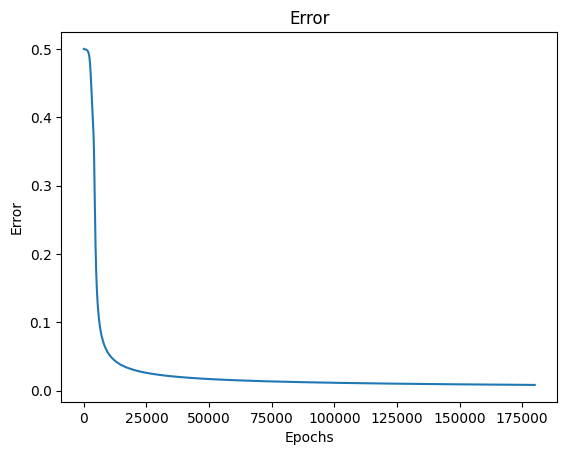

In [10]:
plt.plot(error_list)
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

Epoch: 9999, Average error: 0.02603
Epoch: 19999, Average error: 0.01649
Epoch: 29999, Average error: 0.01285
Epoch: 39999, Average error: 0.01082
Epoch: 49999, Average error: 0.00949
Epoch: 59999, Average error: 0.00853
Epoch: 69999, Average error: 0.00781
Epoch: 79999, Average error: 0.00723
Epoch: 89999, Average error: 0.00676
Epoch: 99999, Average error: 0.00637
Epoch: 109999, Average error: 0.00604
Epoch: 119999, Average error: 0.00575
Epoch: 129999, Average error: 0.00549
Epoch: 139999, Average error: 0.00527
Epoch: 149999, Average error: 0.00507
Epoch: 159999, Average error: 0.00489
Epoch: 169999, Average error: 0.00473
Epoch: 179999, Average error: 0.00458

Final output after training: [[3.15534624e-04 5.21621059e-03 4.93530987e-03 9.92143025e-01]]
Ground truth [0 0 0 1]
Error after training: [[-0.00031554 -0.00521623 -0.00493532  0.007857  ]]
Average error: 0.00458


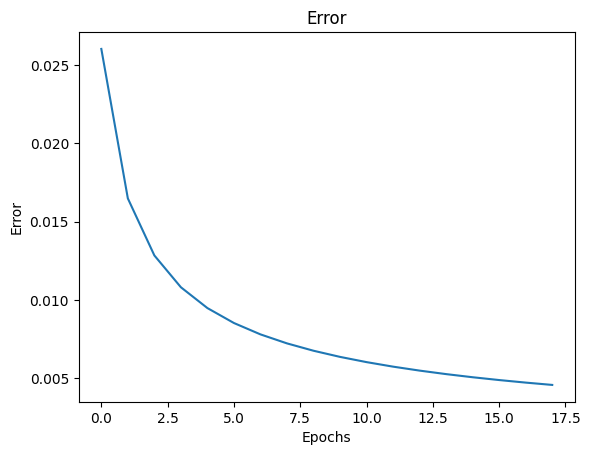

In [11]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T  # 2x4 matrix, each column is a training example
d = np.array([0, 0, 0, 1])  # Expected output for AND

# Get initialized parameters
w1, b1, w2, b2, lr, epochs = initialize_network_parameters()

# Training the network using backpropagation
error_list = []
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
    a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

    z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
    a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

    # Error calculation and backpropagation
    error = d - a2  # Difference between expected and actual output
    da2 = error * (a2 * (1 - a2))  # Derivative for output layer
    dz2 = da2  # Gradient for output layer

    # Propagate error to hidden layer
    da1 = np.dot(w2.T, dz2)  # Gradient for hidden layer
    dz1 = da1 * (a1 * (1 - a1))  # Derivative for hidden layer

    # Update weights and biases
    w2 += lr * np.dot(dz2, a1.T)  # Update weights from hidden to output layer
    b2 += lr * np.sum(dz2, axis=1, keepdims=True)  # Update bias for output layer

    w1 += lr * np.dot(dz1, X.T)  # Update weights from input to hidden layer
    b1 += lr * np.sum(dz1, axis=1, keepdims=True)  # Update bias for hidden layer
    if (epoch+1)%10000 == 0:
        print("Epoch: %d, Average error: %0.05f"%(epoch, np.average(abs(error))))
        error_list.append(np.average(abs(error)))


# Testing the trained network
z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

# Print results
print('\nFinal output after training:', a2)
print('Ground truth', d)
print('Error after training:', error)
print('Average error: %0.05f'%np.average(abs(error)))

# Plot error
plt.plot(error_list)
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

Epoch: 9999, Average error: 0.15875
Epoch: 19999, Average error: 0.03744
Epoch: 29999, Average error: 0.02602
Epoch: 39999, Average error: 0.02102
Epoch: 49999, Average error: 0.01807
Epoch: 59999, Average error: 0.01607
Epoch: 69999, Average error: 0.01461
Epoch: 79999, Average error: 0.01348
Epoch: 89999, Average error: 0.01257
Epoch: 99999, Average error: 0.01182
Epoch: 109999, Average error: 0.01119
Epoch: 119999, Average error: 0.01065
Epoch: 129999, Average error: 0.01018
Epoch: 139999, Average error: 0.00977
Epoch: 149999, Average error: 0.00940
Epoch: 159999, Average error: 0.00907
Epoch: 169999, Average error: 0.00877
Epoch: 179999, Average error: 0.00850

Final output after training: [[0.00854289 0.99022809 0.99193102 0.0076208 ]]
Ground truth [0 1 1 0]
Error after training: [[-0.00854292  0.00977194  0.008069   -0.00762083]]
Average error: 0.00850


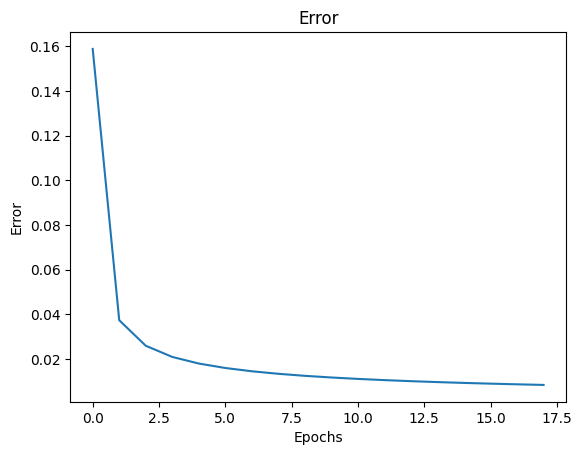

In [13]:
lr = 0.01         # Learning rate
epochs = 1000000   # Number of training epochs


# Defining inputs and expected output (XOR truth table)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T  # 2x4 matrix, each column is a training example
d = np.array([0, 1, 1, 0])  # Expected output for XOR

# Get initialized parameters
w1, b1, w2, b2, lr, epochs = initialize_network_parameters()

# Training the network using backpropagation
error_list = []
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
    a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

    z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
    a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

    # Error calculation and backpropagation
    error = d - a2  # Difference between expected and actual output
    da2 = error * (a2 * (1 - a2))  # Derivative for output layer
    dz2 = da2  # Gradient for output layer

    # Propagate error to hidden layer
    da1 = np.dot(w2.T, dz2)  # Gradient for hidden layer
    dz1 = da1 * (a1 * (1 - a1))  # Derivative for hidden layer

    # Update weights and biases
    w2 += lr * np.dot(dz2, a1.T)  # Update weights from hidden to output layer
    b2 += lr * np.sum(dz2, axis=1, keepdims=True)  # Update bias for output layer

    w1 += lr * np.dot(dz1, X.T)  # Update weights from input to hidden layer
    b1 += lr * np.sum(dz1, axis=1, keepdims=True)  # Update bias for hidden layer
    if (epoch+1)%10000 == 0:
        print("Epoch: %d, Average error: %0.05f"%(epoch, np.average(abs(error))))
        error_list.append(np.average(abs(error)))


# Testing the trained network
z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

# Print results
print('\nFinal output after training:', a2)
print('Ground truth', d)
print('Error after training:', error)
print('Average error: %0.05f'%np.average(abs(error)))
plt.plot(error_list)
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()
